In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame()
df['age'] = [28, 42, 27, 24, 35, 54, 35, 37]
df

,age
0,28
1,42
2,27
3,24
4,35
5,54
6,35
7,37


## Central tendency
- describes a point around which datapoints in a variable will cluster
- aka mean, median, mode


In [3]:
# mean = sum(x) / n
sum(df['age']) / len(df['age'])

35.25

In [4]:
# mean with NumPy
import numpy as np
np.mean(df['age'])

35.25

In [5]:
# median, the middle value in a sorted variable
# using Vanilla Python
import statistics

statistics.median(df['age'])

35.0

In [7]:
# median with NumPy
import numpy as np
np.median(df['age'])

35.0

In [10]:
# mode, the value that occurs most frequently
# using the stats module
import statistics
statistics.mode(df['age'])
# Note: statistics error if multiple modes found

35

In [13]:
# this avoids stats error with multi modes
# however will only show the first one

# generate a list of unique elements and how often they occur
(values, counts) = np.unique(df['age'], return_counts=True)

# location in the values list of the most-freq occuring element
ind = np.argmax(counts)

# most freq element
values[ind]

35

# How to revise the code above to get all of the modes?
------

# Variance
- how much values differ from the central tendency, and each other
v = sum((x - mean) ** 2) / (n - 1)
- divide by n - 1 (sample standard deviation) instead of just n (population standard deviation) to not underestimate population variance

In [14]:
# calculate variance with pandas
df['age'].var()

92.5

In [18]:
# calculate variance with numpy, see below for ddof explanation
np.var(df.age, ddof=1)

92.5

# Standard Deviation
- square root of the variance
s = v ** 0.5

In [16]:
# NumPy defaults to population stdev, need to modify to give sample stdev
# do this by manually setting 'delta degrees of freedom', ddof
np.std(df['age'], ddof=1)

9.617692030835672

# Standard error
- aka margin of error
- ex. survey states 44% of respondents support measure X with a se= 4%; this means if the survey were re-ran several times, the results will lie within 40 - 48 %
- se = s / (n**0.5) ; standard deviation of sample s, divided by sqrt of sample size n

In [17]:
# Numpy standard error
np.std(df['age'], ddof=1) / np.sqrt(len(df['age']))

3.4003676271838605

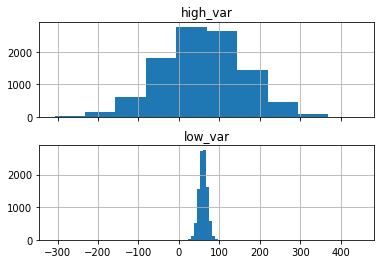

In [24]:
import matplotlib.pyplot as plt

# create empty data frame
pop=pd.DataFrame()

# create two variable with mean = 60
# one with low (sd=10), and one with high (sd=100) standard dev
pop['low_var']=np.random.normal(60, 10, 10000)
pop['high_var']=np.random.normal(60, 100, 10000)

# then create histograms
pop.hist(layout=(2, 1), sharex=True)
plt.show()

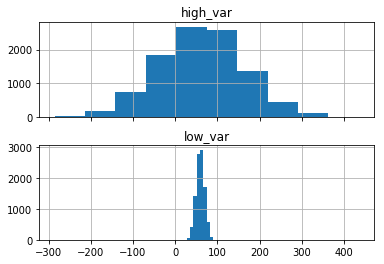

In [30]:
# create empty data frame
pop=pd.DataFrame()

# create two variable with mean = 60
# one with low (sd=10), and one with high (sd=100) standard dev
pop['low_var']=np.random.normal(60, 10, 10000)
pop['high_var']=np.random.normal(60, 100, 10000)

# then create histograms
pop.hist(layout=(2, 1), sharex=True)
plt.show()

In [27]:
print(pop.max())

low_var     106.780409
high_var    458.756562
dtype: float64


In [28]:
print(pop.min())

low_var      23.610817
high_var   -323.155690
dtype: float64


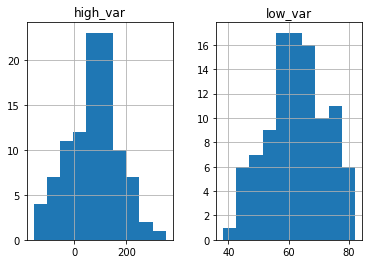

In [31]:
# take a random sample of 100 observations from each var 
# and store in new data frame
sample=pd.DataFrame()
sample['low_var']=np.random.choice(pop['low_var'], 100)
sample['high_var']=np.random.choice(pop['high_var'], 100)

sample.hist()
plt.show()

In [34]:
sample.mean()

low_var     62.675622
high_var    72.812146
dtype: float64

In [35]:
pop.mean()

low_var     59.994478
high_var    62.029788
dtype: float64

In [33]:
sample.std(ddof=1)

low_var      9.798437
high_var    98.193676
dtype: float64

In [36]:
pop.std(ddof=1)

low_var       9.971544
high_var    100.164822
dtype: float64

# Describing data with Pandas
-----

In [37]:
data = pd.DataFrame()
data['gender'] = ['male'] * 100 + ['female'] * 100
data['height'] = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100)) 
# np.random.normal(center, stdev, sample-size)
data['weight'] = np.append(np.random.normal(195, 25, 100), np.random.normal(166, 15, 100))

In [38]:
data

,gender,height,weight
0,male,74.249291,147.931644
1,male,65.081867,186.392897
2,male,77.377552,157.925981
3,male,68.931636,204.491722
4,male,84.933495,180.824838
5,male,57.633014,183.085132
6,male,67.172285,183.808727
7,male,74.234474,175.638349
8,male,62.169078,137.816743
9,male,68.925198,199.479544


In [39]:
data.head()

,gender,height,weight
0,male,74.249291,147.931644
1,male,65.081867,186.392897
2,male,77.377552,157.925981
3,male,68.931636,204.491722
4,male,84.933495,180.824838


# Review: methods with two types of output
- iterative: stays the same shape with modified values
- aggregative: condenses the data into a single value output
- data.describe()

In [40]:
data.describe()
# does not include gender because it appears as a string

,height,weight
count,200.000000,200.000000
mean,66.889632,177.805586
std,7.051053,24.890404
min,44.962736,126.827383
25%,62.128204,158.536100
50%,66.759956,176.002304
75%,70.881373,193.697210
max,88.637946,249.171318


In [41]:
# now, lets include gender as a grouping
data.groupby('gender').describe()

height                                                        \
        count       mean       std        min        25%        50%   
gender                                                                
female  100.0  65.061001  4.645949  53.161588  61.809962  64.832494   
male    100.0  68.718264  8.461484  44.962736  63.520589  68.454633   

                             weight                                     \
              75%        max  count        mean        std         min   
gender                                                                   
female  68.315136  74.214350  100.0  164.605746  15.168623  129.178661   
male    73.610498  88.637946  100.0  191.005425  25.753521  126.827383   

                                                        
               25%         50%         75%         max  
gender                                                  
female  154.768409  166.132060  175.970851  202.365477  
male    176.820265  190.800778  208.045377  249.171318

In [42]:
# counts of distinct strings as values
data.gender.value_counts()

female    100
male      100
Name: gender, dtype: int64